<a href="https://colab.research.google.com/github/prophetss/lppls/blob/master/lppls_for_minute_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U lppls

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from lppls import lppls, data_loader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 新段落

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/trading/WINFUT_F_0_1min_2021.csv")[["Fechamento"]]

In [ ]:
df

,Fechamento
0,105865
1,105870
2,105885
3,105930
4,105910
...,...
134312,120365
134313,120375
134314,120335
134315,120445


In [ ]:
print(len(df))
df_trunc = df.tail(250)
print(len(df_trunc))

134317
250


In [ ]:
df_trunc.head()

,Fechamento
134067,118675
134068,118760
134069,118705
134070,118825
134071,118810


<Axes: >

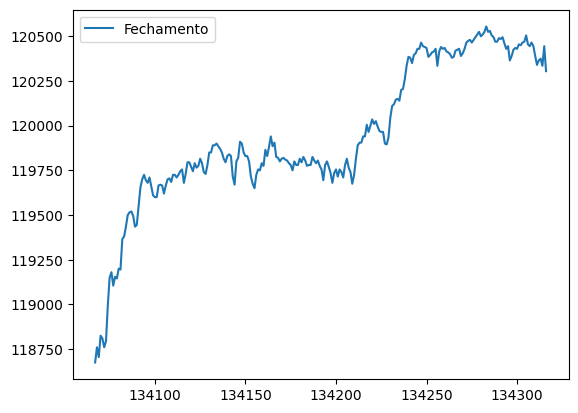

In [ ]:
df_trunc.plot()

In [ ]:
# convert time to linearly spaced
t = np.linspace(0, len(df_trunc), len(df_trunc))

# create list of observation data
price = np.log(df_trunc['Fechamento'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([t, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)


In [ ]:
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120,
    smallest_window_size=30,
    outer_increment=1,
    inner_increment=5,
    max_searches=12,
    # filter_conditions_config={} # not implemented in 0.6.x
)

100%|██████████| 131/131 [09:02<00:00,  4.14s/it]


In [ ]:
res_df = lppls_model.compute_indicators(res)
res_df

,time,price,pos_conf,neg_conf,_fits


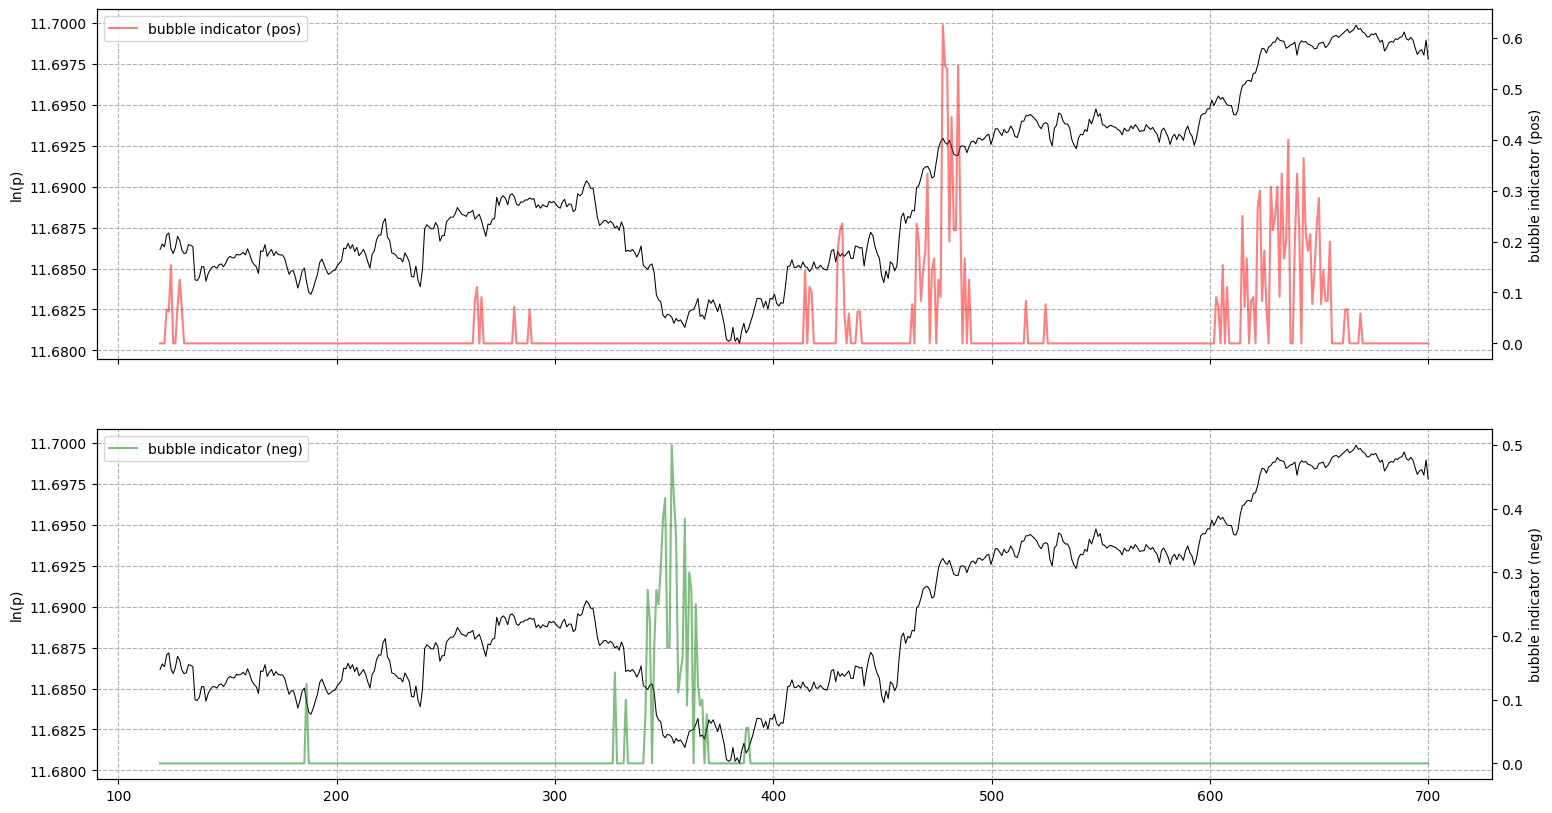

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(18, 10))

# plot pos bubbles
ax1_0 = ax1.twinx()
ax1.plot(res_df['time'], res_df['price'], color='black', linewidth=0.75)
# ax1_0.plot(compatible_date, pos_lst, label='pos bubbles', color='gray', alpha=0.5)
ax1_0.plot(res_df['time'], res_df['pos_conf'], label='bubble indicator (pos)', color='red', alpha=0.5)

# plot neg bubbles
ax2_0 = ax2.twinx()
ax2.plot(res_df['time'], res_df['price'], color='black', linewidth=0.75)
# ax2_0.plot(compatible_date, neg_lst, label='neg bubbles', color='gray', alpha=0.5)
ax2_0.plot(res_df['time'], res_df['neg_conf'], label='bubble indicator (neg)', color='green', alpha=0.5)

# set grids
ax1.grid(which='major', axis='both', linestyle='--')
ax2.grid(which='major', axis='both', linestyle='--')

# set labels
ax1.set_ylabel('ln(p)')
ax2.set_ylabel('ln(p)')

ax1_0.set_ylabel('bubble indicator (pos)')
ax2_0.set_ylabel('bubble indicator (neg)')

ax1_0.legend(loc=2)
ax2_0.legend(loc=2)

plt.xticks(rotation=45)
plt.show()